In [ ]:
import pandas as pd
import numpy as np
import glob
import os
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize


In [2]:
tram_data = pd.read_csv("../data/tram_complete.csv")

In [3]:
tram_data.head()

,Unnamed: 0,Year,Month,Day,Hour,Minute,Second,DD_AKST,DD_Expected_AKST,Offset_time,...,Red_i,NIR_i,Red_r,NIR_r,NDVI,T_air_C,T_surf_C,date,Polygon_type,Topo_feature
0,0,2014,5,27,23,1,30,147.95937,147.95833,0.025000,...,-28.021,-49.142,-0.837,-1.470,-0.118,-5.897,-6.082,2014-05-27,LCP,center
1,1,2014,5,28,5,1,31,148.20939,148.20833,0.025278,...,-51.557,-88.863,-1.519,-2.616,-0.119,-6.138,-6.169,2014-05-28,LCP,center
2,2,2014,5,28,8,1,31,148.33439,148.33333,0.025278,...,-204.277,-344.720,-6.234,-10.531,-0.118,-5.934,-5.000,2014-05-28,LCP,center
3,3,2014,5,28,11,1,30,148.45937,148.45833,0.025000,...,-430.776,-740.186,-13.618,-23.447,-0.118,-5.299,-3.226,2014-05-28,LCP,center
4,4,2014,5,28,14,1,30,148.58437,148.58333,0.025000,...,-446.671,-762.150,-14.021,-23.953,-0.118,-5.524,-3.460,2014-05-28,LCP,center


In [45]:
tram_data.columns

Index(['Unnamed: 0', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Second',
       'DD_AKST', 'DD_Expected_AKST', 'Offset_time', 'DD_UTC', 'Run_number',
       'Stop_number', 'Height', 'ShortW_inc', 'ShortW_out', 'Albedo',
       'LongW_inc', 'LongW_out', 'Net_shortW', 'Net_longW', 'Net_Rad',
       'Sol_Irr_inc', 'Sol_Irr_out', 'PAR_inc', 'PAR_out', 'fPAR', 'Red_i',
       'NIR_i', 'Red_r', 'NIR_r', 'NDVI', 'T_air_C', 'T_surf_C', 'date',
       'Polygon_type', 'Topo_feature'],
      dtype='object')

In [42]:
# List of dates to filter and plot
year = 2014
dates_to_plot = [f'{year}-05-28', 
                 f'{year}-06-07', f'{year}-06-18', 
                 f'{year}-07-05',  
                 f'{year}-08-18',
                 f'{year}-09-05']

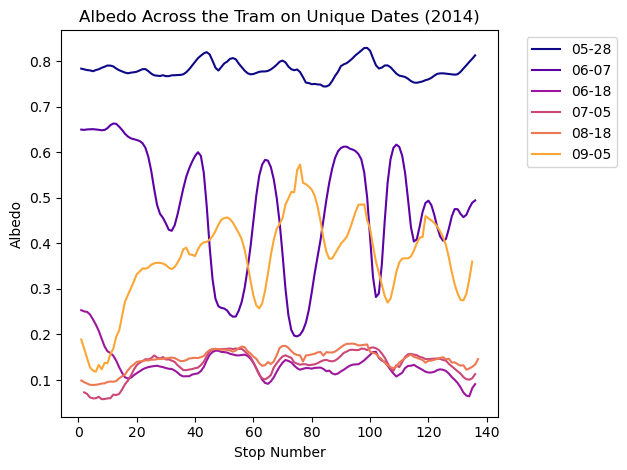

In [49]:

# Normalize the dates to a range of 0 to 1 for the colormap
norm = Normalize(vmin=0, vmax=len(dates_to_plot))
colors = cm.plasma(norm(range(len(dates_to_plot))))
colors[-1] = cm.plasma(0.8)  # Adjust the last color to be darker

# Plot each date with a continuous color
for i, date in enumerate(dates_to_plot):
    tram_data_date = tram_data[tram_data['date'] == date]
    albedo_data = tram_data_date.groupby(['Stop_number'])['Albedo'].mean().reset_index()
    plt.plot(albedo_data['Stop_number'], albedo_data['Albedo'], label=date[5:], color=colors[i])  # Extract month and day

# Add labels, legend, and title
plt.xlabel('Stop Number')
plt.ylabel('Albedo')
plt.title('Albedo Across the Tram on Unique Dates (2014)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()


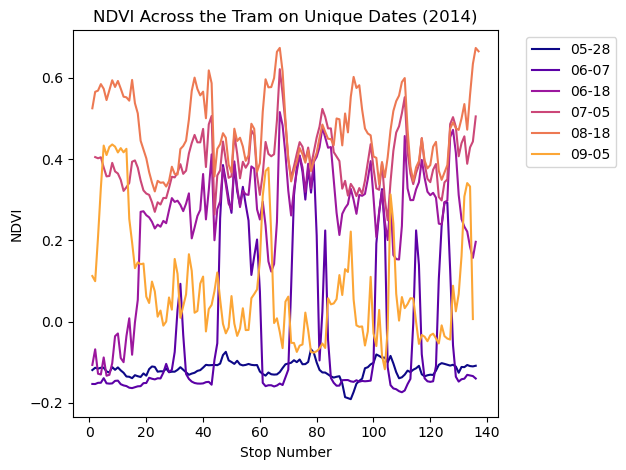

In [50]:
# Normalize the dates to a range of 0 to 1 for the colormap
norm = Normalize(vmin=0, vmax=len(dates_to_plot))
colors = cm.plasma(norm(range(len(dates_to_plot))))
colors[-1] = cm.plasma(0.8)  # Adjust the last color to be darker

# Plot each date with a continuous color
for i, date in enumerate(dates_to_plot):
    tram_data_date = tram_data[tram_data['date'] == date]
    albedo_data = tram_data_date.groupby(['Stop_number'])['NDVI'].mean().reset_index()
    plt.plot(albedo_data['Stop_number'], albedo_data['NDVI'], label=date[5:], color=colors[i])  # Extract month and day

# Add labels, legend, and title
plt.xlabel('Stop Number')
plt.ylabel('NDVI')
plt.title('NDVI Across the Tram on Unique Dates (2014)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()